<a href="https://colab.research.google.com/github/cesarlimca/Diplomado-TE-y-MD/blob/main/Modulo5_Practica8_Generaci%C3%B3n_de_num_alea_normal_Equipo5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicio 8**
Equipo 5:
* Estrada Barrón Teresa Jazmin
* González Herrera Cecilia Gabriela
* Hernández Nieto Brayan David
* Limones Carro César Adrián

**Genera una simulación de una distribución normal con parámetros N(10,2)**

In [ ]:
#@title Importamos librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import random
import pandas as pd

In [ ]:
#@title Creamos las funciones para la simulación

# Función para encontrar el intervalo dado un valor aleatorio uniforme
def find_interval(r, y_values):
    for i in range(len(y_values) - 1):
        y_min = y_values[i]
        y_max = y_values[i+1]
        y_mi = round(y_min,4)
        y_ma = round(y_max,4)
        interval = "[" + str(y_mi) + str(y_ma) + "]"
        if y_min <= r <= y_max:
            return i , interval
    return -1 , interval

# Función para generar valores aleatorios de una distribución normal
def simulate_normal(mu, sigma, num_samples, num_cortes):
    samples = []
    columnas = ["r", "Intervalo de r", "Lambda", "Intervalo de x" , "x"]
    datos = []
    np.random.seed(0) # Se fija la misma semilla para replicar valores iguales
    for _ in range(num_samples):
        r = np.random.uniform(0, 1)
        index = find_interval(r, y_values)[0]
        if index == -1:
            continue  # Manejar casos fuera de rango
        lambda_ = (y_values[index+1] - r) / (y_values[index+1] - y_values[index])
        x = lambda_ * x_values[index] + (1 - lambda_) * x_values[index+1]
        x_normal = x * sigma + mu
        samples.append(x_normal)
        datos.append([round(r,4), find_interval(r, y_values)[1], lambda_, "[" + str(round(x_values[index],4)) + str(round(x_values[index+1],4)) + "]", round(x_normal,4)])
    df = pd.DataFrame(datos, columns=columnas)
    return np.array(samples),df

## Simulación para N(0,1)

### Con 5 cortes

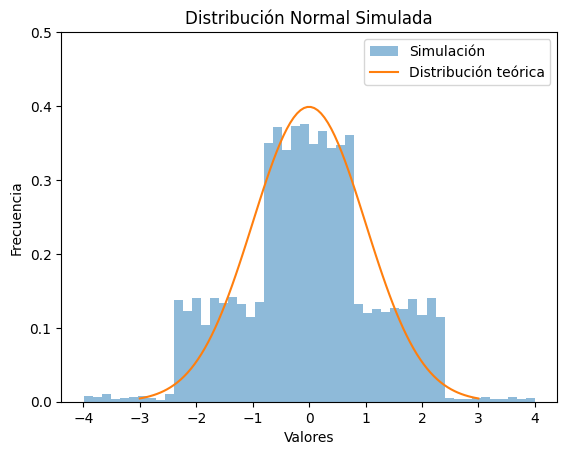

In [ ]:
# Parámetros de la distribución
mu = 0  # Media
sigma = 1  # Desviación estándar

# Número de puntos de corte
num_cortes = 5

# Generar los puntos de corte en la distribución normal estándar
x_values = np.linspace(-4, 4, num_cortes+1)
y_values = norm.cdf(x_values)

# Generar muestras
num_samples = 10000
samples, tabla = simulate_normal(mu, sigma, num_samples, num_cortes)

# Visualizar la distribución simulada
plt.hist(samples, bins=50, density=True, alpha=0.5, label='Simulación')
#Dist Normal
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma), label='Distribución teórica')


plt.title('Distribución Normal Simulada')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.ylim(top=.5)
plt.legend()
plt.show()

In [ ]:
tabla

,r,Intervalo de r,Lambda,Intervalo de x,x
0,0.5488,[0.21190.7881],0.415297,[-0.80.8],0.1355
1,0.7152,[0.21190.7881],0.126595,[-0.80.8],0.5974
2,0.6028,[0.21190.7881],0.321681,[-0.80.8],0.2853
3,0.5449,[0.21190.7881],0.422117,[-0.80.8],0.1246
4,0.4237,[0.21190.7881],0.632477,[-0.80.8],-0.2120
...,...,...,...,...,...
9994,0.5504,[0.21190.7881],0.412463,[-0.80.8],0.1401
9995,0.3972,[0.21190.7881],0.678467,[-0.80.8],-0.2855
9996,0.7584,[0.21190.7881],0.051563,[-0.80.8],0.7175
9997,0.0238,[0.00820.2119],0.923451,[-2.4-0.8],-2.2775


Donde los intervalos de "r" son:

In [ ]:
r1 = tabla["Intervalo de r"].unique()
for i in r1:
  print(i)

[0.21190.7881]
[0.78810.9918]
[0.00820.2119]
[0.00.0082]
[0.99181.0]


Y los intervalos de "x" son:

In [ ]:
x1 = tabla["Intervalo de x"].unique()
for i in x1:
  print(i)

[-0.80.8]
[0.82.4]
[-2.4-0.8]
[-4.0-2.4]
[2.44.0]


### Con 100 cortes

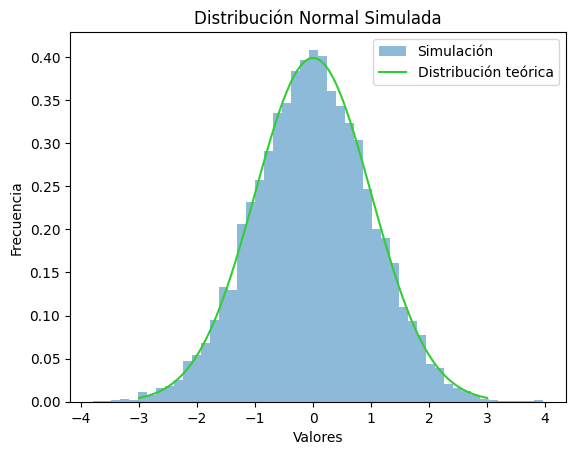

In [ ]:
# Parámetros de la distribución
mu = 0  # Media
sigma = 1  # Desviación estándar

# Número de puntos de corte
num_cortes = 100

# Generar los puntos de corte en la distribución normal estándar
x_values = np.linspace(-4, 4, num_cortes)
y_values = norm.cdf(x_values)

samples2, tabla2 = simulate_normal(mu, sigma, num_samples, num_cortes)


# Visualizar la distribución simulada
plt.hist(samples2, bins=50, density=True, alpha=0.5, label='Simulación')
#Dist Normal
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma), label='Distribución teórica',color="limegreen")


plt.title('Distribución Normal Simulada')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [ ]:
tabla2

,r,Intervalo de r,Lambda,Intervalo de x,x
0,0.5488,[0.54820.58],0.981924,[0.12120.202],0.1227
1,0.7152,[0.70030.7278],0.457770,[0.52530.6061],0.5691
2,0.6028,[0.580.6113],0.274231,[0.2020.2828],0.2607
3,0.5449,[0.51610.5482],0.104449,[0.04040.1212],0.1128
4,0.4237,[0.420.4518],0.883552,[-0.202-0.1212],-0.1926
...,...,...,...,...,...
9994,0.5504,[0.54820.58],0.930580,[0.12120.202],0.1268
9995,0.3972,[0.38870.42],0.728495,[-0.2828-0.202],-0.2609
9996,0.7584,[0.75390.7787],0.817636,[0.68690.7677],0.7016
9997,0.0238,[0.01970.0239],0.018052,[-2.0606-1.9798],-1.9813


Donde los intervalos de "r" son:

In [ ]:
r2 = tabla2["Intervalo de r"].unique()
for i in r2:
  print(i)

[0.54820.58]
[0.70030.7278]
[0.580.6113]
[0.51610.5482]
[0.420.4518]
[0.64190.6716]
[0.87930.8948]
[0.95880.9655]
[0.35810.3887]
[0.77870.8019]
[0.92130.9325]
[0.06750.0787]
[0.07870.0912]
[0.01970.0239]
[0.82360.8438]
[0.75390.7787]
[0.86230.8793]
[0.97610.9803]
[0.45180.4839]
[0.10520.1207]
[0.61130.6419]
[0.13770.1562]
[0.94250.9512]
[0.38870.42]
[0.24610.2722]
[0.01610.0197]
[0.67160.7003]
[0.05750.0675]
[0.19810.2213]
[0.12070.1377]
[0.29970.3284]
[0.98690.9894]
[0.09120.1052]
[0.15620.1764]
[0.22130.2461]
[0.17640.1981]
[0.80190.8236]
[0.72780.7539]
[0.03450.0412]
[0.27220.2997]
[0.00430.0055]
[0.95120.9588]
[0.84380.8623]
[0.48390.5161]
[0.89480.9088]
[0.90880.9213]
[0.99880.9991]
[0.97120.9761]
[0.01060.0131]
[0.04880.0575]
[0.32840.3581]
[0.02880.0345]
[0.93250.9425]
[0.02390.0288]
[0.98940.9914]
[0.01310.0161]
[0.98030.9839]
[0.04120.0488]
[0.98390.9869]
[0.96550.9712]
[0.99140.9931]
[0.99310.9945]
[0.00690.0086]
[0.00270.0034]
[0.99790.9984]
[0.99910.9993]
[0.00340.0043]
[0.

Y los intervalos de "x" son:

In [ ]:
x2 = tabla2["Intervalo de x"].unique()
for i in x2:
  print(i)

[0.12120.202]
[0.52530.6061]
[0.2020.2828]
[0.04040.1212]
[-0.202-0.1212]
[0.36360.4444]
[1.17171.2525]
[1.73741.8182]
[-0.3636-0.2828]
[0.76770.8485]
[1.41411.4949]
[-1.4949-1.4141]
[-1.4141-1.3333]
[-2.0606-1.9798]
[0.92931.0101]
[0.68690.7677]
[1.09091.1717]
[1.97982.0606]
[-0.1212-0.0404]
[-1.2525-1.1717]
[0.28280.3636]
[-1.0909-1.0101]
[1.57581.6566]
[-0.2828-0.202]
[-0.6869-0.6061]
[-2.1414-2.0606]
[0.44440.5253]
[-1.5758-1.4949]
[-0.8485-0.7677]
[-1.1717-1.0909]
[-0.5253-0.4444]
[2.22222.303]
[-1.3333-1.2525]
[-1.0101-0.9293]
[-0.7677-0.6869]
[-0.9293-0.8485]
[0.84850.9293]
[0.60610.6869]
[-1.8182-1.7374]
[-0.6061-0.5253]
[-2.6263-2.5455]
[1.65661.7374]
[1.01011.0909]
[-0.04040.0404]
[1.25251.3333]
[1.33331.4141]
[3.03033.1111]
[1.8991.9798]
[-2.303-2.2222]
[-1.6566-1.5758]
[-0.4444-0.3636]
[-1.899-1.8182]
[1.49491.5758]
[-1.9798-1.899]
[2.3032.3838]
[-2.2222-2.1414]
[2.06062.1414]
[-1.7374-1.6566]
[2.14142.2222]
[1.81821.899]
[2.38382.4646]
[2.46462.5455]
[-2.4646-2.3838]
[-2.7

Al aumentar el número de cortes, la aproximación a la distribución normal continua mejora, ya que la discretización se vuelve más fina. Sin embargo, también aumenta el costo computacional.

Dado que creamos las funciones para cualquier normal, podemos replicar para el ejercicio N(10,2)

## Simulación para N(10,2)

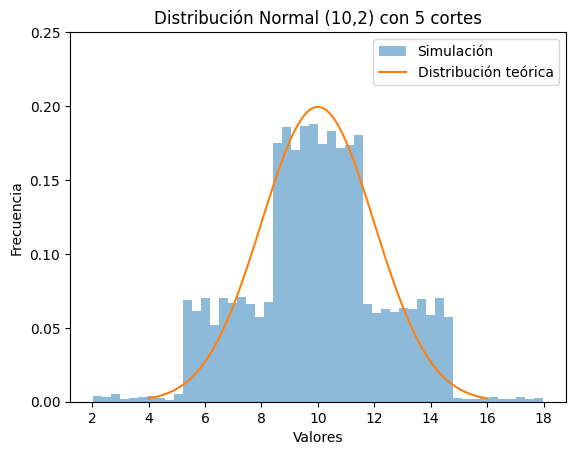

In [47]:
# Parámetros de la distribución
mu = 10  # Media
sigma = 2  # Desviación estándar

# Número de puntos de corte
num_cortes = 5

# Generar los puntos de corte en la distribución normal estándar
x_values = np.linspace(-4, 4, num_cortes+1)
y_values = norm.cdf(x_values)

# Generar muestras
num_samples = 10000
samples, tabla3 = simulate_normal(mu, sigma, num_samples, num_cortes)

# Visualizar la distribución simulada
plt.hist(samples, bins=50, density=True, alpha=0.5, label='Simulación')
#Dist Normal
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma), label='Distribución teórica')


plt.title('Distribución Normal (10,2) con 5 cortes')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.ylim(top=.25)
plt.legend()
plt.show()

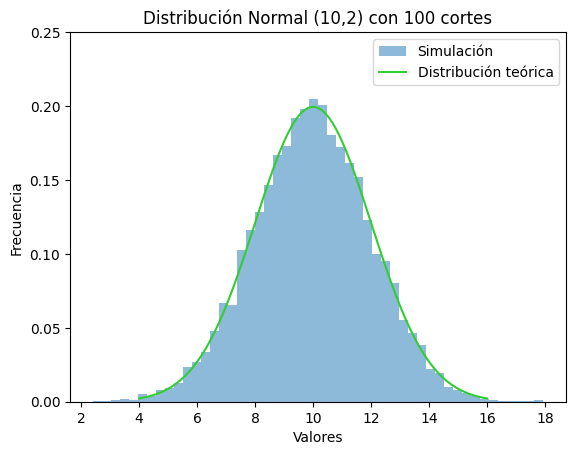

In [46]:
# Parámetros de la distribución
mu = 10  # Media
sigma = 2  # Desviación estándar

# Número de puntos de corte
num_cortes = 100

# Generar los puntos de corte en la distribución normal estándar
x_values = np.linspace(-4, 4, num_cortes+1)
y_values = norm.cdf(x_values)

# Generar muestras
num_samples = 10000
samples, tabla3 = simulate_normal(mu, sigma, num_samples, num_cortes)

# Visualizar la distribución simulada
plt.hist(samples, bins=50, density=True, alpha=0.5, label='Simulación')
#Dist Normal
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma), label='Distribución teórica',color="limegreen")


plt.title('Distribución Normal (10,2) con 100 cortes')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.ylim(top=.25)
plt.legend()
plt.show()

In [ ]:
tabla3

,r,Intervalo de r,Lambda,Intervalo de x,x
0,0.5488,[0.50.6051],0.535716,[0.00.2667],10.2476
1,0.7152,[0.70310.7881],0.857832,[0.53330.8],11.1425
2,0.6028,[0.50.6051],0.022577,[0.00.2667],10.5213
3,0.5449,[0.50.6051],0.573098,[0.00.2667],10.2277
4,0.4237,[0.39490.5],0.726149,[-0.26670.0],9.6127
...,...,...,...,...,...
9994,0.5504,[0.50.6051],0.520181,[0.00.2667],10.2559
9995,0.3972,[0.39490.5],0.978234,[-0.26670.0],9.4783
9996,0.7584,[0.70310.7881],0.349400,[0.53330.8],11.4137
9997,0.0238,[0.01640.031],0.494765,[-2.1333-1.8667],6.0028


Donde los intervalos de "r" son:

In [ ]:
r3 = tabla3["Intervalo de r"].unique()
for i in r3:
  print(i)

[0.53190.5636]
[0.71230.7389]
[0.59480.6255]
[0.40520.4364]
[0.62550.6554]
[0.43640.4681]
[0.88490.8997]
[0.96080.9671]
[0.37450.4052]
[0.78810.8106]
[0.50.5319]
[0.56360.5948]
[0.92510.9357]
[0.06430.0749]
[0.08690.1003]
[0.01880.0228]
[0.83150.8508]
[0.76420.7881]
[0.86860.8849]
[0.97720.9812]
[0.11510.1314]
[0.13140.1492]
[0.93570.9452]
[0.26110.2877]
[0.65540.6844]
[0.34460.3745]
[0.68440.7123]
[0.05480.0643]
[0.18940.2119]
[0.28770.3156]
[0.98750.9898]
[0.10030.1151]
[0.14920.1685]
[0.23580.2611]
[0.81060.8315]
[0.97260.9772]
[0.46810.5]
[0.73890.7642]
[0.03290.0392]
[0.31560.3446]
[0.16850.1894]
[0.00410.0052]
[0.21190.2358]
[0.94520.9535]
[0.95350.9608]
[0.91310.9251]
[0.99880.9991]
[0.85080.8686]
[0.01020.0125]
[0.04650.0548]
[0.01540.0188]
[0.02740.0329]
[0.02280.0274]
[0.98980.9918]
[0.89970.9131]
[0.07490.0869]
[0.01250.0154]
[0.98120.9846]
[0.03920.0465]
[0.98460.9875]
[0.96710.9726]
[0.99180.9934]
[0.99340.9948]
[0.00660.0082]
[0.00260.0033]
[0.99740.998]
[0.99910.9993]
[0

Y los intervalos de "x" son:

In [ ]:
x3 = tabla3["Intervalo de x"].unique()
for i in x3:
  print(i)

[0.080.16]
[0.560.64]
[0.240.32]
[-0.24-0.16]
[0.320.4]
[-0.16-0.08]
[1.21.28]
[1.761.84]
[-0.32-0.24]
[0.80.88]
[0.00.08]
[0.160.24]
[1.441.52]
[-1.52-1.44]
[-1.36-1.28]
[-2.08-2.0]
[0.961.04]
[0.720.8]
[1.121.2]
[2.02.08]
[-1.2-1.12]
[-1.12-1.04]
[1.521.6]
[-0.64-0.56]
[0.40.48]
[-0.4-0.32]
[0.480.56]
[-1.6-1.52]
[-0.88-0.8]
[-0.56-0.48]
[2.242.32]
[-1.28-1.2]
[-1.04-0.96]
[-0.72-0.64]
[0.880.96]
[1.922.0]
[-0.080.0]
[0.640.72]
[-1.84-1.76]
[-0.48-0.4]
[-0.96-0.88]
[-2.64-2.56]
[-0.8-0.72]
[1.61.68]
[1.681.76]
[1.361.44]
[3.043.12]
[1.041.12]
[-2.32-2.24]
[-1.68-1.6]
[-2.16-2.08]
[-1.92-1.84]
[-2.0-1.92]
[2.322.4]
[1.281.36]
[-1.44-1.36]
[-2.24-2.16]
[2.082.16]
[-1.76-1.68]
[2.162.24]
[1.841.92]
[2.42.48]
[2.482.56]
[-2.48-2.4]
[-2.8-2.72]
[2.82.88]
[3.123.2]
[-2.72-2.64]
[-3.04-2.96]
[-3.28-3.2]
[3.523.6]
[-2.4-2.32]
[2.562.64]
[-2.56-2.48]
[-2.88-2.8]
[2.642.72]
[2.882.96]
[2.963.04]
[-3.44-3.36]
[-2.96-2.88]
[-3.84-3.76]
[-3.2-3.12]
[2.722.8]
[3.924.0]
[3.843.92]
[3.763.84]
[-3.36

## **Conclusión**

Al aumentar la cantidad de cortes, la simulación se aproxima cada vez más a la distribución normal que busca emular. Sin embargo, el costo computacional es aumenta con cada nuevo corte.